<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [13]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
seaborn.set_context('talk')

In [14]:
# Leer DATA SET DE DRIVE, si este no funciona usar solo el de abajo
try:
  url = 'https://drive.google.com/file/d/1-9kBojyci_7lVVC4kqm-wix1R83Mtjbk/view?usp=sharing'
  path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

  melb_df= pandas.read_csv(path)
  melb_df['Postcode_Agrupado'] = melb_df['Postcode_Agrupado'].astype('str') 
  melb_df['Postcode_Agrupado'] = melb_df['Postcode_Agrupado'].astype('category') 
  melb_df[:3]
except:
  #Cargar DATA SET DE GITHUB

  #Url donde se encuentran los datos
  url ='https://github.com/charly3d/Grupo17-Analisis-y-Curacion/blob/main/Entregables_Resueltos/'

  #Url Raw para poder levantar los datos
  url2='https://raw.githubusercontent.com/charly3d/Grupo17-Analisis-y-Curacion/main/Entregables_Resueltos/'   
                                                                                                                                         
  melb_df=pandas.read_csv(url2 + 'melb_df_parte1.csv')
  melb_df[:3]

In [15]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12342 entries, 0 to 12341
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Suburb             12342 non-null  object  
 1   Rooms              12342 non-null  int64   
 2   Type               12342 non-null  object  
 3   Price              12342 non-null  float64 
 4   Method             12342 non-null  object  
 5   Postcode           12342 non-null  int64   
 6   Bathroom           12342 non-null  int64   
 7   Car                12342 non-null  int64   
 8   Landsize           12342 non-null  float64 
 9   BuildingArea       6332 non-null   float64 
 10  YearBuilt          7351 non-null   float64 
 11  CouncilArea        12335 non-null  object  
 12  Lattitude          12342 non-null  float64 
 13  Longtitude         12342 non-null  float64 
 14  Regionname         12342 non-null  object  
 15  Postcode_Agrupado  12342 non-null  category
 16  Airb

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


## Ejercicio 2: Imputación por KNN
 
En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.
 
1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

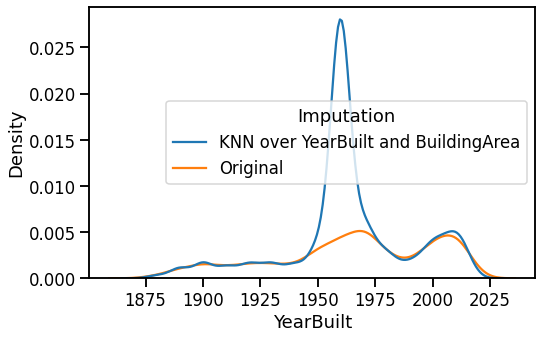

In [17]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.
 
Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

### Estandarizar los datos

El PCA se ve afectado por la escala, por lo que debe escalar las características de sus datos antes de aplicar el PCA. La estandarización es una normalización estandar: aplicar la función Z-score a los datos.

Se utiliza *StandardScaler* para estandarizar las características del conjunto de datos en la escala de la unidad ($(\mu,\sigma) = (0,1)$) que es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático. 

Para ver el efecto negativo que puede tener no escalar tus datos, scikit-learn tiene una sección sobre los efectos de no estandarizar tus datos [1](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

## Ejercicio 4: Composición del resultado
 
Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.
 
Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [18]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Car']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()


Matrix has shape (12342, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (12342, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Car']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Car,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-0.858633,-0.164382
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,-1.498014,-0.924825
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-0.809123,-1.460706
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,-0.169742,-0.700263
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.158530,-0.475701


## Ejercicio 5: Documentación
 
En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas
 
Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:
 
```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900
 
  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].
 
  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...
 
  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```

#Resolución

## Ejercicio 1: Encoding




###1.1 Seleccion de todas las filas y columnas excepto BuildingArea y YearBuilt

In [19]:
#Inspeccionamos nuestro conjunto de datos
melb_df.head(3)

,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Postcode_Agrupado,Airbnb_Price
0,Abbotsford,2,h,1480000.0,S,3067,1,1,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,3099.0,130.62402
1,Abbotsford,2,h,1035000.0,S,3067,1,0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,3099.0,130.62402
2,Abbotsford,3,h,1465000.0,SP,3067,2,0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,3099.0,130.62402


In [20]:
melb_df.isna().sum()

Suburb                  0
Rooms                   0
Type                    0
Price                   0
Method                  0
Postcode                0
Bathroom                0
Car                     0
Landsize                0
BuildingArea         6010
YearBuilt            4991
CouncilArea             7
Lattitude               0
Longtitude              0
Regionname              0
Postcode_Agrupado       0
Airbnb_Price           26
dtype: int64

In [21]:
#Le quitamos las filas que tienen Nan para las columnas de CouncilArea y Airbnb_Price
melb_df_na = melb_df.dropna(subset=['CouncilArea', 'Airbnb_Price'])  # Esto se podria hacer al final del entregable 1

In [22]:
#Excluimos las columnas de BuildingArea y YearBuilt siguiendo el enunciado.
excepcion = ['BuildingArea','YearBuilt']
col = melb_df_na.columns.isin(excepcion)

#Crea data frame con todas las columnas menos BuildingArea y YearBuilt
df_filt=melb_df_na.loc[:,~col]   
df_filt

,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Postcode_Agrupado,Airbnb_Price
0,Abbotsford,2,h,1480000.0,S,3067,1,1,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,3099.0,130.62402
1,Abbotsford,2,h,1035000.0,S,3067,1,0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3099.0,130.62402
2,Abbotsford,3,h,1465000.0,SP,3067,2,0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3099.0,130.62402
3,Abbotsford,3,h,850000.0,PI,3067,2,1,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,3099.0,130.62402
4,Abbotsford,4,h,1600000.0,VB,3067,1,2,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,3099.0,130.62402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,Westmeadows,3,h,582000.0,S,3049,2,2,256.0,Hume,-37.67917,144.89390,Northern Metropolitan,3099.0,92.28571
12338,Wheelers Hill,4,h,1245000.0,S,3150,2,2,652.0,Monash,-37.90562,145.16761,South-Eastern Metropolitan,3199.0,124.02646
12339,Williamstown,3,h,1031000.0,SP,3016,2,2,333.0,Hobsons Bay,-37.85927,144.87904,Western Metropolitan,3099.0,191.09459
12340,Williamstown,3,h,1170000.0,S,3016,2,4,436.0,Hobsons Bay,-37.85274,144.88738,Western Metropolitan,3099.0,191.09459


In [23]:
#Verifico que se hayan eliminado los Nan en el conjunto de datos (también observo que las columnas YearBuilt y BuildingArea ya no estan)
df_filt.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price                0
Method               0
Postcode             0
Bathroom             0
Car                  0
Landsize             0
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Postcode_Agrupado    0
Airbnb_Price         0
dtype: int64

###1.2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.

####Análisis del Conjunto de Datos

In [24]:
#Variables y sus tipos
categorical_cols = ['Type','Method','CouncilArea','Regionname','Postcode_Agrupado']  #Revisar si queremos dejar Council Area
discretas = ['Rooms','Bathroom','Car']
continuas = ['Distance','Lattitude','Longtitude','BuildingArea', 'Landsize','Airbnb_Price' ]  

In [25]:
#Ver valores unicos de cada Categoria
df_filt[categorical_cols].nunique()

Type                  3
Method                5
CouncilArea          30
Regionname            8
Postcode_Agrupado     8
dtype: int64

In [26]:
# Chequear los Nulos
df_filt[categorical_cols].isna().sum()

Type                 0
Method               0
CouncilArea          0
Regionname           0
Postcode_Agrupado    0
dtype: int64

####Reducir el número de categorías únicas **CouncilArea**

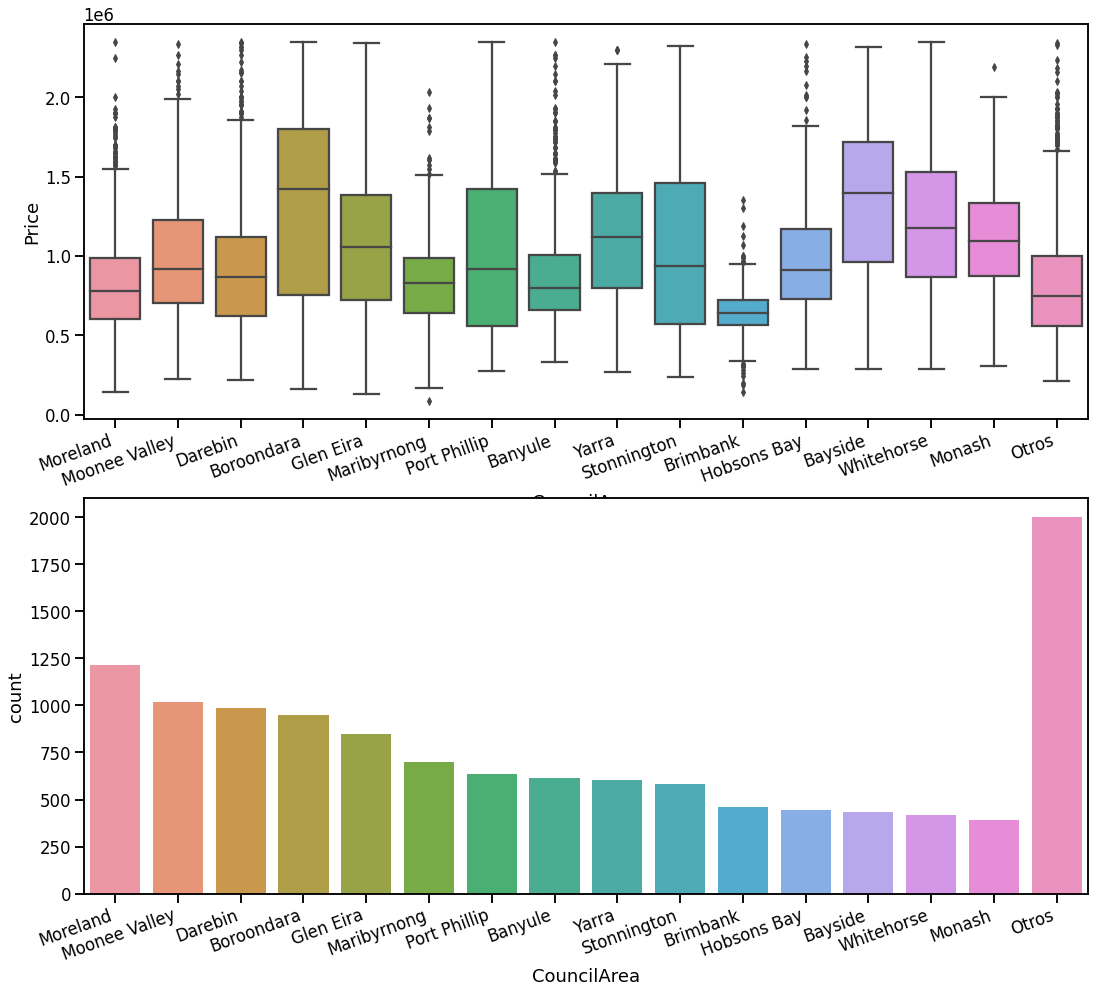

In [27]:
#Agrupamiento por cantidad de Categorias deseadas
#Si quiero dejar solo 15 categorias selecciono n=15

n=15 #15 Categorias

df=df_filt.copy()
serie=df['CouncilArea']
resumen=serie.value_counts()
categorias=serie.unique()
nva=resumen.nlargest(n)

orden=[]
a=[]
dict={}

if len(categorias)>n:
  a=['Otros']

for i in resumen.index:
  if resumen.loc[i]<nva.iloc[-1]:
    dict[i]='Otros'
  else:
    dict[i]=i
    orden+=[i]

orden=orden+a

#Reemplazo de Columna
df.loc[:,'CouncilArea']=df['CouncilArea'].replace(dict)

#Grafico
f,axs=plt.subplots(2,1,figsize=(18,16))
cajas=seaborn.boxplot(data=df,x='CouncilArea',y='Price',ax=axs[0],order=orden)
conteo=seaborn.countplot(data=df,x='CouncilArea',order=orden)
conteo.set_xticklabels(conteo.get_xticklabels(),rotation=20,horizontalalignment='right')
cajas.set_xticklabels(cajas.get_xticklabels(),rotation=20, horizontalalignment='right')
print()

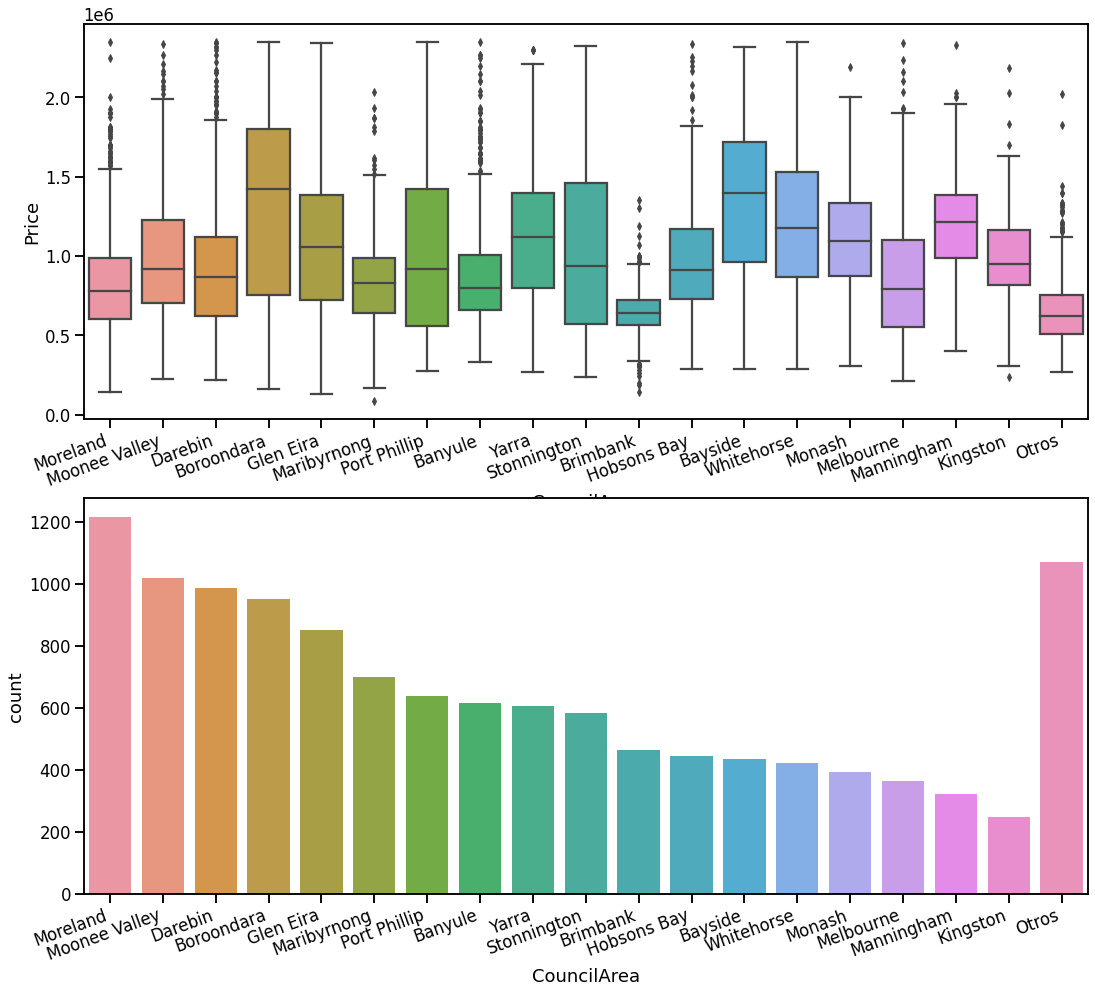

In [28]:
#Otra opcion en agrupar categorias en Otros por % minimo de valores en la categoria
#Si quiero quedarme con las categorias que tengan minimamente el 2% de los datos hago min=0.02

min_=len(df_filt)*0.02 #Al menos 2% de los datos

df=df_filt.copy()
serie=df['CouncilArea']
resumen=serie.value_counts()

dicc={}
orden=[]


for i in resumen.index:
  if resumen.loc[i]<min_:
    dicc[i]='Otros'
  else:
    orden+=[i]
    dicc[i]=i
orden=orden+['Otros']

#Reemplazo de Columna
df.loc[:,'CouncilArea']=df['CouncilArea'].replace(dicc)

#Grafico
f,axs=plt.subplots(2,1,figsize=(18,16))
cajas=seaborn.boxplot(data=df,x='CouncilArea',y='Price',ax=axs[0],order=orden)
conteo=seaborn.countplot(data=df,x='CouncilArea',order=orden)
conteo.set_xticklabels(conteo.get_xticklabels(),rotation=20,horizontalalignment='right')
cajas.set_xticklabels(cajas.get_xticklabels(),rotation=20, horizontalalignment='right')
print()


In [29]:
#Verifico cuantos valores unicos quedaron para cada categoría luego del agrupamiento
df[categorical_cols].nunique() #De 30 categorías para CouncilArea me quedaron 18

Type                  3
Method                5
CouncilArea          19
Regionname            8
Postcode_Agrupado     8
dtype: int64

Al reducir la cantidad de Categorias de CouncilArea, la columna Otros se hace la más frecuente y no tiene mucho sentido, por lo que vamos a descartar council area por el momento.

 **Excluimos Price para no tenerla en cuenta para la imputaciones**

In [30]:
excepcion = ['Price']
col =df.columns.isin(excepcion)

#Crea data frame con todas las columnas menos BuildingArea y YearBuilt
df=df.loc[:,~col]   
df

,Suburb,Rooms,Type,Method,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Postcode_Agrupado,Airbnb_Price
0,Abbotsford,2,h,S,3067,1,1,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,3099.0,130.62402
1,Abbotsford,2,h,S,3067,1,0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3099.0,130.62402
2,Abbotsford,3,h,SP,3067,2,0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3099.0,130.62402
3,Abbotsford,3,h,PI,3067,2,1,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,3099.0,130.62402
4,Abbotsford,4,h,VB,3067,1,2,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,3099.0,130.62402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,Westmeadows,3,h,S,3049,2,2,256.0,Otros,-37.67917,144.89390,Northern Metropolitan,3099.0,92.28571
12338,Wheelers Hill,4,h,S,3150,2,2,652.0,Monash,-37.90562,145.16761,South-Eastern Metropolitan,3199.0,124.02646
12339,Williamstown,3,h,SP,3016,2,2,333.0,Hobsons Bay,-37.85927,144.87904,Western Metropolitan,3099.0,191.09459
12340,Williamstown,3,h,S,3016,2,4,436.0,Hobsons Bay,-37.85274,144.88738,Western Metropolitan,3099.0,191.09459


#### Encoding

##### Usando get_dummies

In [31]:
# USANDO get_dummies
categorical_cols=['Type','Method','Regionname','Postcode_Agrupado'] #Se descarto CouncilArea
discretas=['Rooms','Bathroom','Car']
continuas=[ 'Landsize','Airbnb_Price' ]

#Obtención de DataFrame con variables categoricas expresadas como vectores de 1 y 0, más el resto de las varibles continuas
dum_df = pandas.get_dummies(df[categorical_cols+discretas+continuas])
dum_df

,Rooms,Bathroom,Car,Landsize,Airbnb_Price,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Postcode_Agrupado_3099.0,Postcode_Agrupado_3199.0,Postcode_Agrupado_3299.0,Postcode_Agrupado_3399.0,Postcode_Agrupado_3499.0,Postcode_Agrupado_3799.0,Postcode_Agrupado_3899.0,Postcode_Agrupado_3999.0
0,2,1,1,202.0,130.62402,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,1,0,156.0,130.62402,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,2,0,134.0,130.62402,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,2,1,94.0,130.62402,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,1,2,120.0,130.62402,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,3,2,2,256.0,92.28571,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
12338,4,2,2,652.0,124.02646,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
12339,3,2,2,333.0,191.09459,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
12340,3,2,4,436.0,191.09459,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


##### Usando OneHotEncoder

In [32]:
#Usando OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', sparse=False)

In [33]:
encoder.fit(df[categorical_cols])
ohe_cat= encoder.transform(df[categorical_cols])

ohe_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
ohe_cat.shape

(12311, 24)

In [35]:
#Variables discretas y continuas
ohe_num=numpy.array(df[discretas+continuas])
ohe_num.shape

(12311, 5)

In [36]:
#Uso de hstack para agregar las variables numericas
ohe_all=numpy.hstack((ohe_num,ohe_cat))

In [37]:
ohe_all

array([[2., 1., 1., ..., 0., 0., 0.],
       [2., 1., 0., ..., 0., 0., 0.],
       [3., 2., 0., ..., 0., 0., 0.],
       ...,
       [3., 2., 2., ..., 0., 0., 0.],
       [3., 2., 4., ..., 0., 0., 0.],
       [4., 1., 1., ..., 0., 0., 0.]])

In [38]:
ohe_all.shape

(12311, 29)

 
## Ejercicio 2: Imputación por KNN(pág.83'99')
 
En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.
 


#### 1.Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.


In [39]:
matriz=numpy.hstack((ohe_all,numpy.array(melb_df_na.YearBuilt).reshape(-1,1),numpy.array(melb_df_na.BuildingArea).reshape(-1,1)))

In [40]:
matriz#.shape

array([[2.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00,       nan,
              nan],
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.900e+03,
        7.900e+01],
       [3.000e+00, 2.000e+00, 0.000e+00, ..., 0.000e+00, 1.900e+03,
        1.500e+02],
       ...,
       [3.000e+00, 2.000e+00, 2.000e+00, ..., 0.000e+00, 1.995e+03,
        1.330e+02],
       [3.000e+00, 2.000e+00, 4.000e+00, ..., 0.000e+00, 1.997e+03,
              nan],
       [4.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 1.920e+03,
        1.120e+02]])

#### 2.Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?



#####Imputación Sin Escalar

In [41]:
#Importamos librerias
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

#Aplicamos instancia de IterativeImputer con estimador KNeighborsRegressor
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(n_neighbors=5))

pred = imputer.fit_transform(matriz)
print(imputer.n_iter_)

10


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [42]:
matriz[:,-2:]

array([[  nan,   nan],
       [1900.,   79.],
       [1900.,  150.],
       ...,
       [1995.,  133.],
       [1997.,   nan],
       [1920.,  112.]])

In [43]:
#Valores de YearBuild y BuildingArea predichos
pred[:,-2:]

array([[1926. ,  111.2],
       [1900. ,   79. ],
       [1900. ,  150. ],
       ...,
       [1995. ,  133. ],
       [1997. ,  220.4],
       [1920. ,  112. ]])

#####Escalado de los Datos

Para utilizar este metodo se recomienda escalar los datos, al utilizar distancias para determinar los vecinos más cercanos, si los datos no están escalados, las variables cuya diferencia entre valores sea de un valor númerico muy alto, va a pesar demasiado en el calculo de distancia entre los puntos.
por ejemplo:

-Precio va entre valores de decenas de miles de dolares a millones de dolares, por lo que la distancia entre dos puntos puede ser muy grande, por otro lado en la cantidad de baños los valores estan en el orden de las unidades, y las distancias entre dos puntos de esta variable no van a ser muy grandes.
Por lo que al componer estas dos distancias la mayor influencia la tendria precio.


In [44]:
#Importamos libreria para escalar los datos
from sklearn.preprocessing import MinMaxScaler

In [45]:
#Lista de columnas del conjunto de datos
columnas = dum_df.columns.to_list()

In [46]:
#Escalamos los datos
scaler = MinMaxScaler((0,1))

#ohe_all_scal = scaler.fit_transform(ohe_all) #Solo se escalan los datos de las otras columnas no YearBu y BuilAre
#matriz_scal=numpy.hstack((ohe_all_scal,numpy.array(melb_df_na.YearBuilt).reshape(-1,1),numpy.array(melb_df_na.BuildingArea).reshape(-1,1)))
matriz_scal = scaler.fit_transform(matriz)

#Verificamos el tamaño
matriz_scal.shape

#Lo importante es que entregar un array de números donde las filas sean los valores 
#de una unidad muestral, es decir los valores de x para un solo punto.

(12311, 31)

In [47]:
matriz_scal[0]

array([0.2       , 0.        , 0.2       , 0.14885777, 0.11494992,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ,        nan,
              nan])

#####Imputación Con Datos Escalados

In [48]:
#Aplicamos instancia de IterativeImputer con estimador KNeighborsRegressor
imputer_scal = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(n_neighbors=5))

pred_scal = imputer_scal.fit_transform(matriz_scal)
print(imputer.n_iter_)

10


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [49]:
#Valores de YearBuild y BuildingArea predichos con datos escalados
pred_scal[:,-2:]

array([[0.17021277, 0.31449275],
       [0.16312057, 0.28623188],
       [0.16312057, 0.54347826],
       ...,
       [0.83687943, 0.48188406],
       [0.85106383, 0.64471014],
       [0.30496454, 0.4057971 ]])

In [50]:
pred_scal[0]

array([0.2       , 0.        , 0.2       , 0.14885777, 0.11494992,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17021277,
       0.31449275])

In [51]:
#Para Des-escalar
pred_scal_inv=scaler.inverse_transform(pred_scal)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


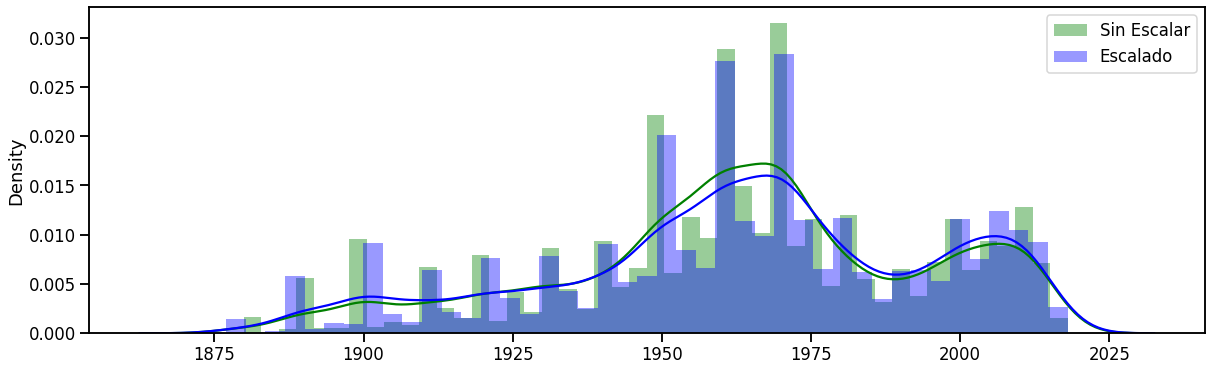

In [52]:
#Plotemoas las 2 instancias para comparar 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
seaborn.distplot(pred[:,-2], ax=ax,color='Green',label='Sin Escalar')

seaborn.distplot(pred_scal_inv[:,-2], ax=ax,color='Blue',label='Escalado')
plt.legend()

Sin escalar los datos se ve una centralización mayor de la distribución de la variable

In [53]:
pred[:,-2].std()

30.664828354989133

In [54]:
pred_scal_inv[:,-2].std()

31.837006817000486

In [55]:
#melb_df_na['BuildingArea']=pred_scal_inv[:,-1]
#melb_df_na['YearBuilt']=pred_scal_inv[:,-2]

### 3.Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.


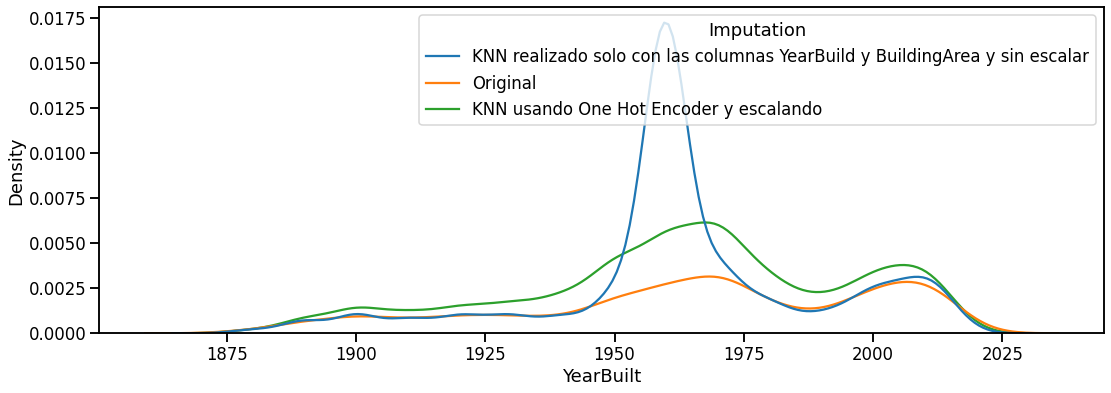

In [56]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN realizado solo con las columnas YearBuild y BuildingArea y sin escalar'
melb_year_build['Imputation'] = 'Original'
imp_year_build=pandas.DataFrame(pred_scal_inv[:,-2],columns=['YearBuilt'])
imp_year_build['Imputation'] = 'KNN usando One Hot Encoder y escalando'
data = pandas.concat([mice_year_built, melb_year_build,imp_year_build])
fig = plt.figure(figsize=(18, 6))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

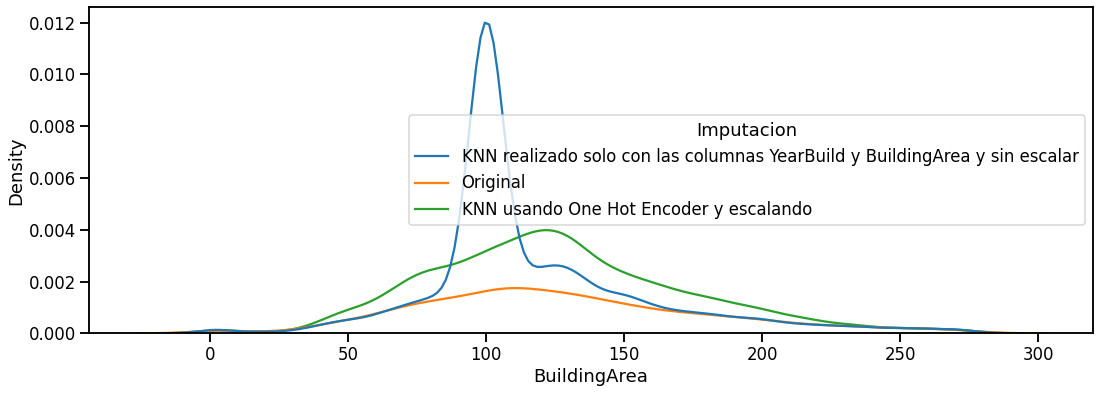

In [57]:
mice_BuildingArea = melb_data_mice.BuildingArea.to_frame()
mice_BuildingArea['Imputacion'] = 'KNN realizado solo con las columnas YearBuild y BuildingArea y sin escalar'
melb_BuildingArea = melb_df.BuildingArea.dropna().to_frame()
melb_BuildingArea['Imputacion'] = 'Original'
imp_BuildingArea=pandas.DataFrame(pred_scal_inv[:,-1],columns=['BuildingArea'])
imp_BuildingArea['Imputacion'] = 'KNN usando One Hot Encoder y escalando'
data = pandas.concat([mice_BuildingArea, melb_BuildingArea,imp_BuildingArea])
fig = plt.figure(figsize=(18, 6))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputacion')

Se ve en los graficos, que escalando y usando el resto de las variables con one hot encoder da mejores resultados

## Ejercicio 3: Reducción de dimensionalidad.(pág.279'293')
 
Utilizando la matriz obtenida en el ejercicio anterior:


In [58]:
#Matriz obtenida en el punto anterior
pred_scal_pca =  pred_scal
pred_scal_pca.shape

(12311, 31)

### 1.Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?


Para aplicar PCA es necesario realizar una estandarización o escalado de los datos, recomendandonse realizar una estandarización.

Es necesario porque si en vez de medir las areas en metros cuadrados se midieran en pulgadas cuadradas, la covarianza (que es sobre lo que trabaja el metodo de PCA) se veria afectada por este cambio de unidad, no cambiando la dimension que nos interesa. Sin escalar o estandarizar le dariamos mayor peso a la variable cuya unidad sea menor, ya que el número que la representa es mayor

#### Con datos escalados resultado ejercicio anterior

In [59]:
#Importo libreria
from sklearn.decomposition import PCA

#Obtengo n componentes principales
n = min(20, pred_scal_pca.shape[1]) # minimo entre 20 y el número de filas

pca = PCA(n_components=n)
pca.fit(pred_scal_pca)
proyected_features = pca.transform(pred_scal_pca)

print("Explained variance: ")
print(pca.explained_variance_.round(4))
print("Explained variance ratio")
print(pca.explained_variance_ratio_.round(4))
#proyected_features.shape

Explained variance: 
[0.7227 0.3971 0.2944 0.2551 0.1512 0.1257 0.1155 0.0909 0.0771 0.0631
 0.0481 0.0324 0.0252 0.0232 0.0197 0.0116 0.0087 0.0085 0.0075 0.0067]
Explained variance ratio
[0.2889 0.1587 0.1177 0.102  0.0604 0.0503 0.0462 0.0364 0.0308 0.0252
 0.0192 0.0129 0.0101 0.0093 0.0079 0.0046 0.0035 0.0034 0.003  0.0027]


#### Con datos estandarizados

In [60]:
from sklearn.preprocessing import StandardScaler
matriz_sin_escalar=matriz.copy()
matriz_sin_escalar[:,-2:]=pred_scal_inv[:,-2:]
scaler=StandardScaler()
matriz_std=scaler.fit_transform(matriz_sin_escalar)

In [61]:
pandas.DataFrame(matriz_std).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00,12311.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.09,-0.77,-1.72,-1.41,-1.27,-1.49,-0.31,-0.54,-0.35,-1.43,-0.08,-0.38,-0.30,-0.35,-0.06,-0.65,-0.04,-0.19,-0.69,-0.54,-0.05,-1.09,-0.82,-0.21,-0.06,-0.06,-0.06,-0.05,-0.03,-2.70,-2.71
25%,-0.97,-0.77,-0.61,-0.84,-0.55,-1.49,-0.31,-0.54,-0.35,-1.43,-0.08,-0.38,-0.30,-0.35,-0.06,-0.65,-0.04,-0.19,-0.69,-0.54,-0.05,-1.09,-0.82,-0.21,-0.06,-0.06,-0.06,-0.05,-0.03,-0.50,-0.68
50%,0.14,-0.77,-0.61,-0.04,-0.23,0.67,-0.31,-0.54,-0.35,0.70,-0.08,-0.38,-0.30,-0.35,-0.06,-0.65,-0.04,-0.19,-0.69,-0.54,-0.05,0.92,-0.82,-0.21,-0.06,-0.06,-0.06,-0.05,-0.03,0.06,-0.09
75%,0.14,0.88,0.49,0.80,0.28,0.67,-0.31,-0.54,-0.35,0.70,-0.08,-0.38,-0.30,-0.35,-0.06,1.53,-0.04,-0.19,1.45,-0.54,-0.05,0.92,1.22,-0.21,-0.06,-0.06,-0.06,-0.05,-0.03,0.69,0.59
max,3.49,4.18,3.79,3.39,10.07,0.67,3.23,1.86,2.83,0.70,11.99,2.61,3.34,2.86,17.74,1.53,23.63,5.31,1.45,1.84,20.23,0.92,1.22,4.77,16.89,17.51,16.33,20.23,30.76,1.73,3.24


In [62]:
#Obtengo n componentes principales

n = min(20, matriz_std.shape[1]) # minimo entre 20 y el número de columnas
pca_std = PCA(n_components=n)
pca_std.fit(matriz_std)
proyected_features = pca_std.transform(matriz_std)

print("Explained variance: ")
print(pca_std.explained_variance_.round(4))
print("Explained variance ratio")
print(pca_std.explained_variance_ratio_.round(4))
#proyected_features.shape

Explained variance: 
[3.9477 3.2758 2.0078 1.9463 1.7088 1.5429 1.4011 1.365  1.253  1.1089
 1.097  1.0579 1.0181 1.0089 0.9827 0.9428 0.9141 0.791  0.7574 0.7146]
Explained variance ratio
[0.1273 0.1057 0.0648 0.0628 0.0551 0.0498 0.0452 0.044  0.0404 0.0358
 0.0354 0.0341 0.0328 0.0325 0.0317 0.0304 0.0295 0.0255 0.0244 0.023 ]


### 2.Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.


Text(0.5, 0, 'Components')

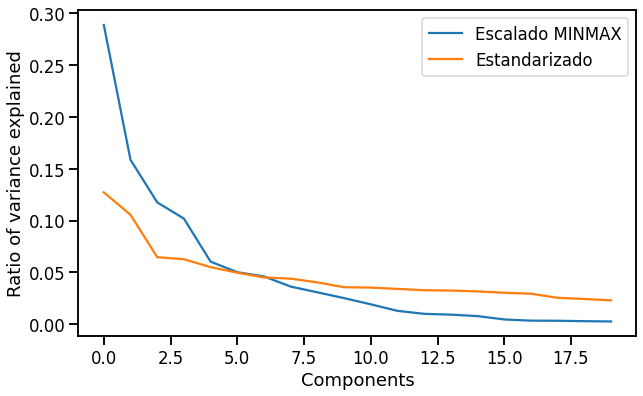

In [63]:
#Porcentaje  de varianza para los primeros n componentes principales
fig = plt.figure(figsize=(10,6))
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_,
                 label='Escalado MINMAX')
seaborn.lineplot(x=range(pca_std.n_components),
                 y=pca_std.explained_variance_ratio_,
                 label='Estandarizado')

plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

Se ve que con el estandarizado, el porcentaje de varianza que explica cada componente es bastante similar, vamos a tomar que al menos explique un 5% de la varianza

In [64]:
#cols = ['YearBuilt', 'Landsize']
#data = melb_df_sample[cols + ['pca1_scaled', 'pca2_scaled']][:1000].dropna(how='any')
#fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Other variables to try: 'Price' 'Landsize' 'Price' 'YearBuilt'
#seaborn.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
#                    hue='YearBuilt', ax=axes[0])  
#seaborn.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
 #                   hue='Landsize', ax=axes[1])

### 3.En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [65]:
#Eleccion por aquellos componentes que expliquen más del 6% de la varianza
porcentaje=0.05
val_may_porce=pca_std.explained_variance_ratio_[(pca_std.explained_variance_ratio_>porcentaje)]
m=len(val_may_porce)
print (f'm={m},varianzas={val_may_porce.round(3)},explican el: {round(val_may_porce.sum(),3)} de la varianza total')

m=5,varianzas=[0.127 0.106 0.065 0.063 0.055],explican el: 0.416 de la varianza total


In [66]:
columnas_PCA=proyected_features[:,-m:]

In [67]:
n_columnas=[]
for i in range(m):
  n_columnas.append(f'Componente{i+1}')

In [68]:
df_PCA=pandas.DataFrame(columnas_PCA,columns=n_columnas)

In [69]:
df_PCA

,Componente1,Componente2,Componente3,Componente4,Componente5
0,0.549854,-0.453588,0.093456,0.017831,-0.033764
1,0.844901,-0.926863,0.212720,-0.592243,0.127163
2,1.082967,-0.243775,0.514492,-1.831404,0.626473
3,0.187858,-0.514866,0.446729,-0.911272,0.306118
4,-0.450819,-0.079701,-0.159461,0.410806,-0.027681
...,...,...,...,...,...
12306,-0.332098,0.681498,-0.049202,-0.463924,0.610993
12307,-1.567506,-1.438622,1.016909,-0.811260,-0.185345
12308,0.212851,0.886340,1.100086,-0.199852,-0.811923
12309,-0.569478,1.598590,1.070427,0.942970,-1.099300


## Ejercicio 4: Composición del resultado
 
Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.
 
Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.

2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.


In [70]:
cat_columns=list(encoder.get_feature_names())

In [71]:
new_df_columns=discretas+continuas+cat_columns+['YearBuilt','BuildingArea']

In [72]:
new_df_columns

['Rooms',
 'Bathroom',
 'Car',
 'Landsize',
 'Airbnb_Price',
 'x0_h',
 'x0_t',
 'x0_u',
 'x1_PI',
 'x1_S',
 'x1_SA',
 'x1_SP',
 'x1_VB',
 'x2_Eastern Metropolitan',
 'x2_Eastern Victoria',
 'x2_Northern Metropolitan',
 'x2_Northern Victoria',
 'x2_South-Eastern Metropolitan',
 'x2_Southern Metropolitan',
 'x2_Western Metropolitan',
 'x2_Western Victoria',
 'x3_3099.0',
 'x3_3199.0',
 'x3_3299.0',
 'x3_3399.0',
 'x3_3499.0',
 'x3_3799.0',
 'x3_3899.0',
 'x3_3999.0',
 'YearBuilt',
 'BuildingArea']

In [73]:
new_df=pandas.DataFrame(pred_scal_inv,columns=new_df_columns)

In [74]:
new_df

,Rooms,Bathroom,Car,Landsize,Airbnb_Price,x0_h,x0_t,x0_u,x1_PI,x1_S,x1_SA,x1_SP,x1_VB,x2_Eastern Metropolitan,x2_Eastern Victoria,x2_Northern Metropolitan,x2_Northern Victoria,x2_South-Eastern Metropolitan,x2_Southern Metropolitan,x2_Western Metropolitan,x2_Western Victoria,x3_3099.0,x3_3199.0,x3_3299.0,x3_3399.0,x3_3499.0,x3_3799.0,x3_3899.0,x3_3999.0,YearBuilt,BuildingArea
0,2.0,1.0,1.0,202.0,130.62402,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1901.0,86.80
1,2.0,1.0,0.0,156.0,130.62402,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.00
2,3.0,2.0,0.0,134.0,130.62402,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.00
3,3.0,2.0,1.0,94.0,130.62402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1934.6,131.40
4,4.0,1.0,2.0,120.0,130.62402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,142.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12306,3.0,2.0,2.0,256.0,92.28571,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1987.6,168.80
12307,4.0,2.0,2.0,652.0,124.02646,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,195.20
12308,3.0,2.0,2.0,333.0,191.09459,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,133.00
12309,3.0,2.0,4.0,436.0,191.09459,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,177.94


In [75]:
df_fin=pandas.concat((new_df,df_PCA),axis=1)
df_fin['Price']=melb_df_na['Price']


In [76]:
df_fin

,Rooms,Bathroom,Car,Landsize,Airbnb_Price,x0_h,x0_t,x0_u,x1_PI,x1_S,x1_SA,x1_SP,x1_VB,x2_Eastern Metropolitan,x2_Eastern Victoria,x2_Northern Metropolitan,x2_Northern Victoria,x2_South-Eastern Metropolitan,x2_Southern Metropolitan,x2_Western Metropolitan,x2_Western Victoria,x3_3099.0,x3_3199.0,x3_3299.0,x3_3399.0,x3_3499.0,x3_3799.0,x3_3899.0,x3_3999.0,YearBuilt,BuildingArea,Componente1,Componente2,Componente3,Componente4,Componente5,Price
0,2.0,1.0,1.0,202.0,130.62402,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1901.0,86.80,0.549854,-0.453588,0.093456,0.017831,-0.033764,1480000.0
1,2.0,1.0,0.0,156.0,130.62402,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.00,0.844901,-0.926863,0.212720,-0.592243,0.127163,1035000.0
2,3.0,2.0,0.0,134.0,130.62402,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.00,1.082967,-0.243775,0.514492,-1.831404,0.626473,1465000.0
3,3.0,2.0,1.0,94.0,130.62402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1934.6,131.40,0.187858,-0.514866,0.446729,-0.911272,0.306118,850000.0
4,4.0,1.0,2.0,120.0,130.62402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,142.00,-0.450819,-0.079701,-0.159461,0.410806,-0.027681,1600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12306,3.0,2.0,2.0,256.0,92.28571,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1987.6,168.80,-0.332098,0.681498,-0.049202,-0.463924,0.610993,512000.0
12307,4.0,2.0,2.0,652.0,124.02646,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1981.0,195.20,-1.567506,-1.438622,1.016909,-0.811260,-0.185345,1502000.0
12308,3.0,2.0,2.0,333.0,191.09459,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,133.00,0.212851,0.886340,1.100086,-0.199852,-0.811923,965000.0
12309,3.0,2.0,4.0,436.0,191.09459,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,177.94,-0.569478,1.598590,1.070427,0.942970,-1.099300,537000.0


In [78]:
try:
  from google.colab import drive
  drive.mount('drive')
  df_fin.to_csv('melb_df_parte2.csv', index = False)
  !cp melb_df_parte2.csv "drive/My Drive/Diplomatura de Ciencia de Datos/GRuPO 17/Analisis y curacion/Entregables/"
except:
  df_fin.to_csv('E:\Documentos\GitHub\Grupo17-Analisis-y-Curacion\Entregables_Resueltos\melb_df_parte2.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:



 ## Ejercicio 5: Documentación 


En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas
 
Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. 



Resultado:
 
```
 ## Criterios de exclusión de ejemplos
  1. Se eliminaron ejemplos donde el precio fuera superior a 2.352.362,5 AUD
  2. Se eliminan ejemplos donde el año de construcción es previo a 1876
  3. Se eliminaron las filas dónde landsize es mayor a 1360.5
  4. Se eliminaron las filas dónde Building Area era mayor a 276
  5. Se Fija valor máximo de Rooms en 6, asignando este valor a las propiedades con más de 6, debido a la baja frecuencia de estos datos
  6. Se Fija valor máximo de Bathrooms en 4,asignando este valor a las propiedades con más de 4, debido a la baja frecuencia de estos datos
  7. Se Fija valor máximo de Bathrooms en 4,asignando este valor a las propiedades con más de 4, debido a la baja frecuencia de estos datos
  8. En la variable Bathroom Se asigno 1 a todas las propiedades en los que este valor era 0.
  9. En la variable Car Se asigno 0 a todas las propiedades en los que este valor era nan.
 10. En la variable Car Se Fija valor máximo de Bathrooms en 5,asignando este valor a las propiedades con más de 5, debido a la baja frecuencia de estos datos.

## Criterios de exclusión de variables
 1. Se elimina la columna Bedroom2, por su alta correlación con rooms, su dudosa procedencia y no aporte de nueva información
 2. Se elimina la columna Address, por se variable categorica de muchas categorias, existiendo otras variables de ubicación mejores.
 3. Se elimina la columna Distance, por su baja correlación con Price.
 4. Se elimina la columna Propertycount, por su baja correlación con Price.
 5. Se elimina la columna SellerG, por sus multiples valores posibles y porque el nombre del vendedor no nos parece relevante en la prediccion de precios
 6. Se elimina la columna Date, porque la serie de tiempo es Estacionaria.
 7. No se utiliza la columna CouncilArea, por sus más de 30 categorias que al intentar agrupar para que queden 15, la columna de otros se vuelve la más frecuente.
 8. No se utiliza la columna Suburb, por la misma razón que Council Area


## Características seleccionadas

### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles.
  2. Method: metodo de venta . 5 valores posibles.
  3. Regionname: nombre de la region donde se encuentra la propiedad.8 valores posibles.
  4. PostCode_agrupado: Se separo a los postcode agrupandolos en 8 categorias.Desde 3000 a 3999.
  5. Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando todos sus valores, ya que no superan los 24 valores en total
 
### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Bathroom: Cantidad de Baños de la propiedad
  3. Car: Cantidad de espacios para los vehiculos
  4. Airbnb_Price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal y en caso de no tener conicidecias se establecio un criterio de cuadricula
     pasando coordenadas en lat, long a utm y dividiendo la cuadricula en 20 x 20,dando como resultados cuadros de 4,824km por 4,198km-
 5.Landsize: el tamaño de la propiedad.
 6.Precio: Precio de la propiedad, No se usa para imputar valores, ni para el calculo de las componentes, ya que el fin de todo es poder predecir precios
 7.YearBuilt: Año de construcción de la propiedad
 8.BuildingArea: Superficie de la propiedad
 
### Transformaciones:
  1. Todas las características numéricas fueron escaladas
  2. Las columnas `YearBuilt` y `BuildingArea` fueron imputadas utilizando el 
     algoritmo KNN, con n=5 (La columna `Price` no fue utilizada)
  4.Luego para reducir la dimensionalidad con el metodo de PCA, se realizo una estandarización (La columna `Price` no fue utilizada)
 
### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.(La columna `Price` no fue utilizada)
```